# Logistic regression
In this chapter you will delve into the details of logistic regression. You'll learn all about regularization and how to interpret model output.

# 1. Logistic regression and regularization
### 1.1 Regularized logistic regression
In Chapter 1, you used logistic regression on the handwritten digits data set. Here, we'll explore the effect of L2 regularization.

The handwritten digits dataset is already loaded, split, and stored in the variables `X_train`, `y_train`, `X_valid`, and `y_valid`. The variables `train_errs` and `valid_errs` are already initialized as empty lists.

### Instructions:
* Loop over the different values of `C_value`, creating and fitting a `LogisticRegression` model each time.
* Save the error on the training set and the validation set for each model.
* Create a plot of the training and testing error as a function of the regularization parameter, `C`.
* Looking at the plot, what's the best value of `C`?

In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

digits = datasets.load_digits()

X_train, X_valid, y_train, y_valid = train_test_split(digits.data, digits.target, random_state=1)

C_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

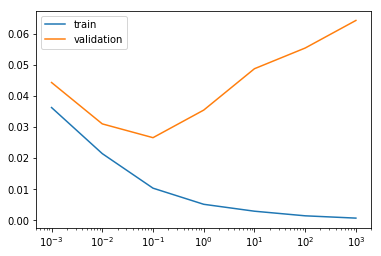

In [2]:
# Train and validaton errors initialized as empty list
train_errs = list()
valid_errs = list()

# Loop over values of C
for C_value in [0.001, 0.01, 0.1, 1, 10, 100, 1000]:
    # Create LogisticRegression object and fit
    lr = LogisticRegression(C=C_value, solver='liblinear', multi_class='ovr') # specified solver and multi_class to fix warning
    lr.fit(X_train, y_train)
    
    # Evaluate error rates and append to lists
    train_errs.append( 1.0 - lr.score(X_train, y_train) )
    valid_errs.append( 1.0 - lr.score(X_valid, y_valid) )
    
# Plot results
plt.semilogx(C_values, train_errs, C_values, valid_errs)
plt.legend(("train", "validation"))
plt.show()

As you can see, too much regularization (small `C`) doesn't work well - due to underfitting - and too little regularization (large `C`) doesn't work well either - due to overfitting.

### 1.2 Logistic regression and feature selection
In this exercise we'll perform feature selection on the movie review sentiment data set using L1 regularization. The features and targets are already loaded for you in `X_train` and `y_train`.

We'll search for the best value of `C` using scikit-learn's `GridSearchCV()`, which was covered in the prerequisite course.

### Instructions:
* Instantiate a logistic regression object that uses L1 regularization.
* Find the value of `C` that minimizes cross-validation error.
* Print out the number of selected features for this value of `C`.

In [3]:
from sklearn.datasets import load_svmlight_files
DATADIR="_datasets/"
X_train, y_train, X_valid, y_valid = load_svmlight_files((DATADIR+"reviews_train_smaller_pm1.txt", 
                                                          DATADIR+"reviews_test_smaller_pm1.txt"))

from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.linear_model import LogisticRegression

# make dataset even smaller for speed
n = 5000
X_train = X_train[:n]
y_train = y_train[:n]
X_valid = X_valid[:n]
y_valid = y_valid[:n]

In [4]:
# Specify L1 regularization
lr = LogisticRegression(penalty='l1', solver='liblinear', multi_class='ovr') # specified solver and multi_class to fix warning

# Instantiate the GridSearchCV object and run the search
searcher = GridSearchCV(lr, {'C':[0.001, 0.01, 0.1, 1, 10]}, cv=3) # specify cv to fix warning
searcher.fit(X_train, y_train)

# Report the best parameters
print("Best CV params", searcher.best_params_)

Best CV params {'C': 1}


In [5]:
# Find the number of nonzero coefficients (selected features)
best_lr = searcher.best_estimator_
coefs = best_lr.coef_
print("Total number of features:", coefs.size)
print("Number of selected features:", np.count_nonzero(coefs))

Total number of features: 2500
Number of selected features: 1218


### 1.3 Identifying the most positive and negative words
In this exercise we'll try to interpret the coefficients of a logistic regression fit on the movie review sentiment dataset. The model object is already instantiated and fit for you in the variable `lr`.

In addition, the words corresponding to the different features are loaded into the variable `vocab`. For example, since `vocab[100]` is "think", that means feature 100 corresponds to the number of times the word "think" appeared in that movie review.

### Instructions:
* Find the words corresponding to the 5 largest coefficients.
* Find the words corresponding to the 5 smallest coefficients.

In [6]:
from sklearn.datasets import load_svmlight_file
DATADIR="_datasets/"
X_train, y_train = load_svmlight_file(DATADIR+"reviews_train_smaller_pm1.txt")

n = 5000
X_train = X_train[:n]
y_train = y_train[:n]

import urllib.request
import numpy as np

with open('_datasets/reviews_vocab.txt') as f:
    vocab = f.read().splitlines()
vocab = np.array(vocab)

from sklearn.linear_model import LogisticRegression

# Fit the model
lr = LogisticRegression(solver='liblinear', multi_class='ovr') # specified solver and multi_class to fix warning
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [7]:
# Get the indices of the sorted coefficients
inds_ascending = np.argsort(lr.coef_.flatten()) 
inds_descending = inds_ascending[::-1]

# Print the most positive words
print("Most positive words: ", end="")
for i in range(5):
    print(vocab[inds_descending[i]], end=", ")
print("\n")

# Print most negative words
print("Most negative words: ", end="")
for i in range(5):
    print(vocab[inds_ascending[i]], end=", ")
print("\n")

Most positive words: favorite, superb, noir, knowing, loved, 

Most negative words: disappointing, waste, worst, boring, lame, 

